In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [88]:
data_dir = './data/airline_satisfaction/'

df_train = pd.read_csv(data_dir + 'train.csv', index_col=0)
df_test = pd.read_csv(data_dir + 'test.csv', index_col=0)

# EDA

In [10]:
df_train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [11]:
df_train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [89]:
# 18 continuous features, 6 categorical features, 1 binary predictor
# get rid of 'id'
df_train.drop('id', inplace=True, axis=1)
df_test.drop('id', inplace=True, axis=1)

In [31]:
df_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


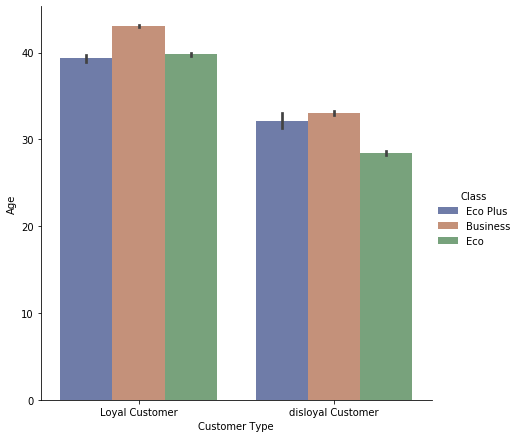

In [35]:
# look at categorical variables
sns.catplot(
    data=df_train, kind="bar",
    x='Customer Type', y='Age',  hue="Class",
     palette="dark", alpha=.6, height=6
)
plt.show()

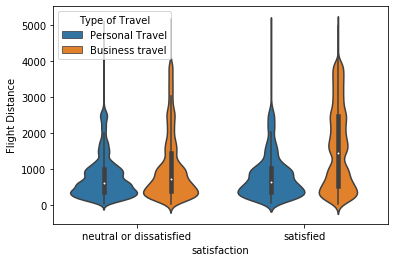

In [39]:
sns.violinplot(data=df_train, x='satisfaction', y='Flight Distance', hue='Type of Travel')
plt.show()

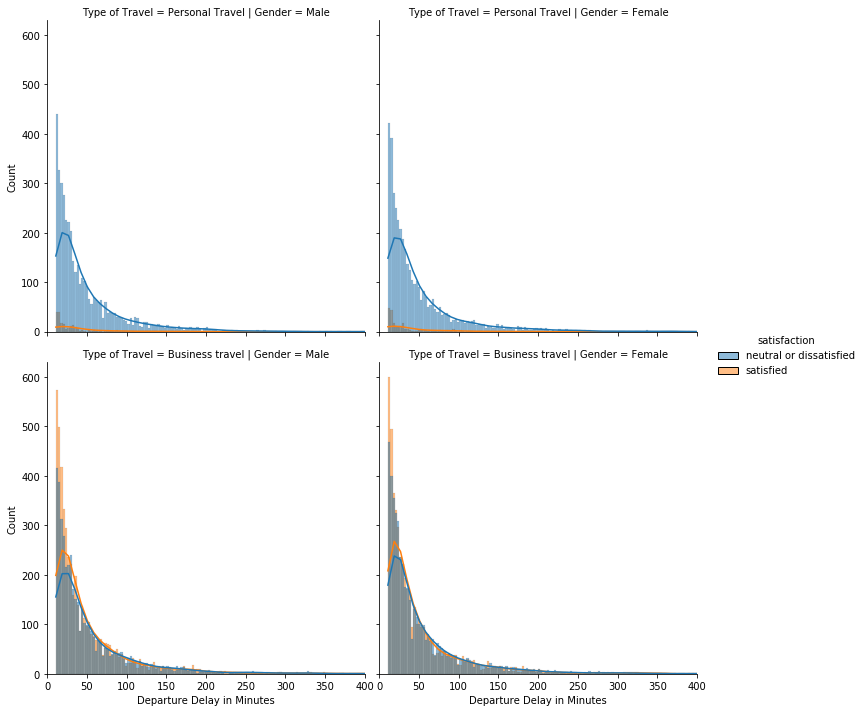

In [59]:
delay_df = df_train[df_train['Departure Delay in Minutes'] > 10]
sns.displot(data=delay_df, x='Departure Delay in Minutes', hue='satisfaction', col='Gender', row='Type of Travel', kde=True)
plt.xlim([0,400])
plt.show()

In [61]:
df_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

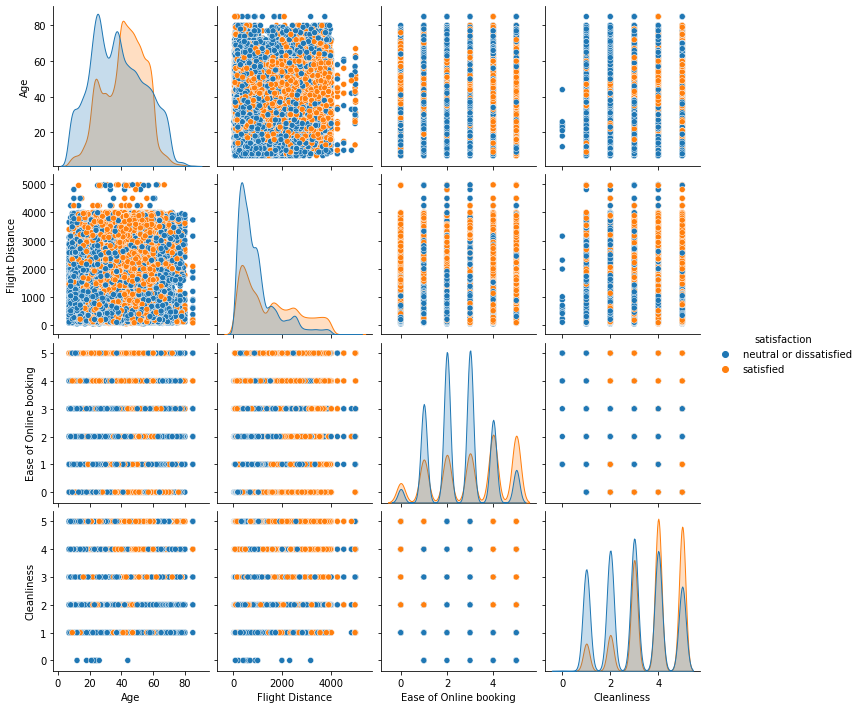

In [64]:
sns.pairplot(df_train, 
        x_vars=['Age', 'Flight Distance', 'Ease of Online booking', 'Cleanliness'],
        y_vars=['Age', 'Flight Distance', 'Ease of Online booking', 'Cleanliness'],
        hue='satisfaction'
)
plt.show()

<Figure size 720x360 with 0 Axes>

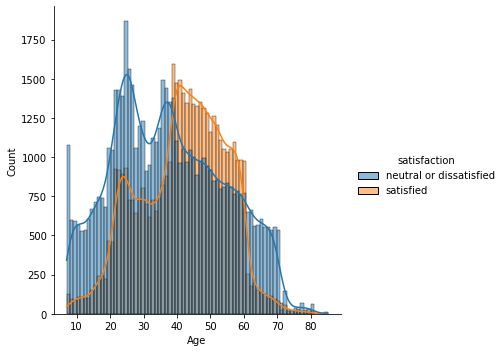

In [69]:
plt.figure(figsize=(10,5))
sns.displot(data=df_train, x='Age', hue='satisfaction', kde=True)
plt.show()

## Clean up features

In [67]:
df_train.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [90]:
to_encode = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
cleanup = dict()
for col in to_encode:
    if len(df_train[col].unique()) == 2:
        cleanup[col] = {k:v for k,v in zip(df_train[col].unique(), [-1,1])}
    elif len(df_train[col].unique()) == 3:
        cleanup[col] = {k:v for k,v in zip(df_train[col].unique(), [-1,0,1])}
    
df_train = df_train.replace(cleanup)
df_test = df_test.replace(cleanup)

In [91]:
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,-1,-1,13,-1,-1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,-1
1,-1,1,25,1,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,-1
2,1,-1,26,1,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,-1,25,1,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,-1
4,-1,-1,61,1,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [94]:
df_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,-1,52,1,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,-1,36,1,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,-1,1,20,1,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,-1
3,-1,-1,44,1,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,-1,49,1,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [96]:
df_train.dtypes, df_test.dtypes

(Gender                                 int64
 Customer Type                          int64
 Age                                    int64
 Type of Travel                         int64
 Class                                  int64
 Flight Distance                        int64
 Inflight wifi service                  int64
 Departure/Arrival time convenient      int64
 Ease of Online booking                 int64
 Gate location                          int64
 Food and drink                         int64
 Online boarding                        int64
 Seat comfort                           int64
 Inflight entertainment                 int64
 On-board service                       int64
 Leg room service                       int64
 Baggage handling                       int64
 Checkin service                        int64
 Inflight service                       int64
 Cleanliness                            int64
 Departure Delay in Minutes             int64
 Arrival Delay in Minutes         

## Train/test splits

In [100]:
X_train = df_train[df_train.columns[:-1]]
y_train = df_train[df_train.columns[-1]]
X_test = df_test[df_test.columns[:-1]]
y_test = df_test[df_test.columns[-1]]

# Begin Models

## 1. Logistic Regression

## 2. SVM

## 3. Random Forests

## 4. Artificial Neural Networks